<a href="https://colab.research.google.com/github/Scodingcurriculum/Artificial-Intelligence-C56/blob/main/L13(Detect_Colors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless

Saving 1.jpg to 1 (1).jpg


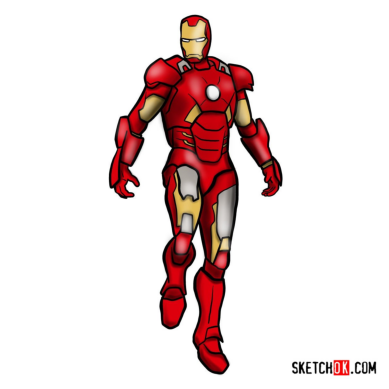

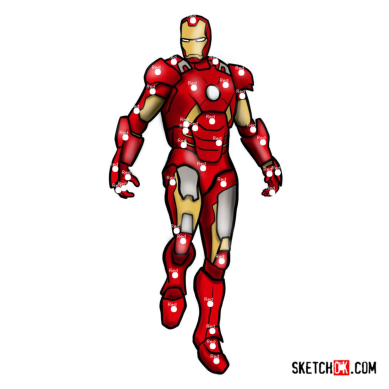

Detected Colors: ['Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red']


In [ ]:
# # Install OpenCV
# !pip install opencv-python-headless

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a function to detect colors and annotate the image
def detect_multiple_colors(image_path):
    # Read the image
    image = cv2.imread("1.jpg")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define color boundaries in RGB
    colors = {
        'Red': ([200, 0, 0], [255, 100, 100]),
        'Green': ([0, 200, 0], [100, 255, 100]),
        'Blue': ([0, 0, 200], [100, 100, 255]),
        'Yellow': ([200, 200, 0], [255, 255, 100]),
        'Orange': ([200, 100, 0], [255, 150, 100])
    }

    # Convert to HSV for color detection
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    detected_colors = []

    # Loop through the colors and find the contours
    for color_name, (lower_bound, upper_bound) in colors.items():
        # Create a mask for the current color
        lower_bound = np.array(lower_bound)
        upper_bound = np.array(upper_bound)
        mask = cv2.inRange(image_rgb, lower_bound, upper_bound)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            # Only consider large enough contours
            if cv2.contourArea(contour) > 100:
                # Get the center of the contour
                M = cv2.moments(contour)
                if M['m00'] != 0:
                    cX = int(M['m10'] / M['m00'])
                    cY = int(M['m01'] / M['m00'])
                    detected_colors.append(color_name)

                    # Draw a circle and annotate the color name
                    cv2.circle(image_rgb, (cX, cY), 10, (255, 255, 255), -1)  # Circle at the center
                    cv2.putText(image_rgb, color_name, (cX-20, cY-10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    return image_rgb, detected_colors

# Upload image file
from google.colab import files
uploaded = files.upload()

# Display the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread("1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# Detect multiple colors in the image
annotated_image, detected_colors = detect_multiple_colors(image_path)

# Display the annotated image with detected colors
plt.imshow(annotated_image)
plt.axis('off')  # Hide axes
plt.show()

# Display the detected colors
print("Detected Colors:", detected_colors)
